In [6]:
import os 
os.chdir(r'C:\Users\braya\Documents\github\colibri-hdsp')

Demo CASSI Reconstruction

In [7]:
#General imports
import matplotlib.pyplot as plt
import torch
import os


# Check GPU support
print("GPU support: ", torch.cuda.is_available())

GPU support:  True


Load Dataset

In [8]:
from colibri_hdsp.data.datasets import Dataset

# Load dataset

dataset_path = 'cifar10'
keys = ''
batch_size = 32

dataset = Dataset(dataset_path, keys, batch_size)

Loading dataset:  cifar10
Files already downloaded and verified
Files already downloaded and verified


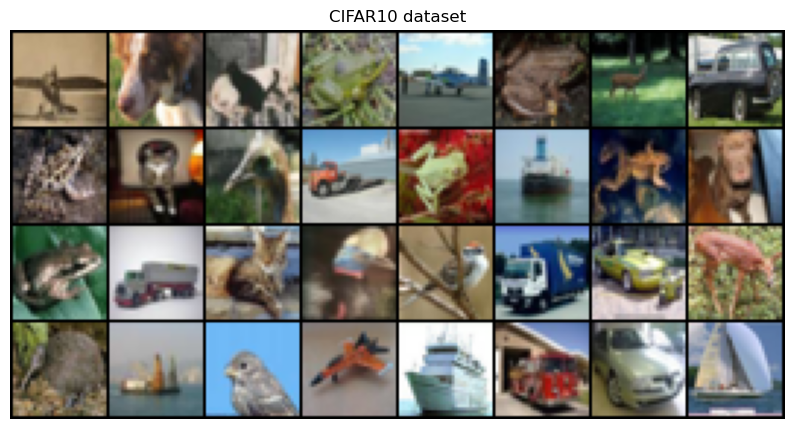

In [11]:
# import make_grid from torchvision
from torchvision.utils import make_grid

sample = next(iter(dataset.train_dataset))[0]

img = make_grid(sample, nrow=8, padding=1, normalize=True, range=None, scale_each=False, pad_value=0)

plt.figure(figsize=(10,10))
plt.imshow(img.permute(1, 2, 0))
plt.title('CIFAR10 dataset')
plt.axis('off')
plt.show()

Optics Layer

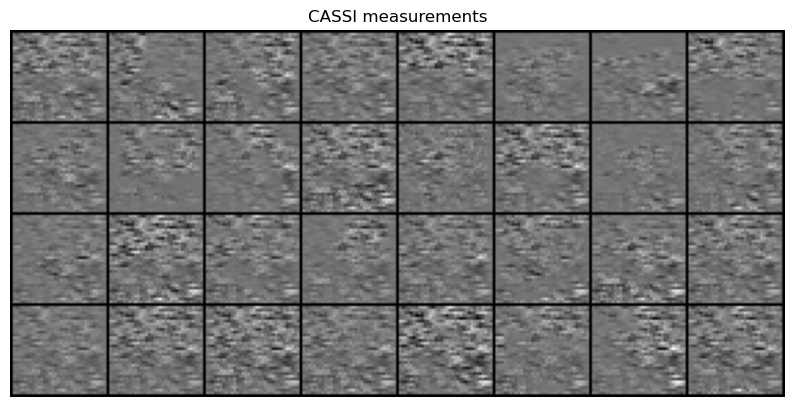

In [12]:
from colibri_hdsp.optics.cassi import CASSI

mode = 'base' # Type of CASSi optical system
cassi =  CASSI(sample.shape[1:], mode, "cpu") # CASSI layer
y = cassi(sample) # CASSI measurements
x_est = cassi(y, type_calculation="backward")

img = make_grid(y, nrow=8, padding=1, normalize=True, range=None, scale_each=False, pad_value=0)


plt.figure(figsize=(10,10))
plt.imshow(img.permute(1, 2, 0))
plt.axis('off')
plt.title('CASSI measurements')
plt.show()